In [30]:
import pandas as pd
import sweetviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Lets read in the data that was pre-processed in the other workbook

In [139]:
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

I have used used sweetviz for EDA

In [3]:
report =  sweetviz.analyze(housing_df)
report.show_html("output/sweetviz_report_housing_data.html")

                                             |                                             | [  0%]   00:00 ->…

C:\Users\Students\anaconda3\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\Students\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\Students\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\Students\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecate

Report output/sweetviz_report_housing_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [32]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)


In [34]:
cols = X_train.columns.tolist()

In [35]:
numerical_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
numerical_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [36]:
categorical_cols = [x for x in cols if x not in numerical_cols]
categorical_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated',
 'zipcode']

In [37]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [38]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['sqft_living', 'sqft_lot', 'sqft_above',
                                  'sqft_basement', 'lat', 'long',
                                  'sqft_living15', 'sqft_lot15']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['bedrooms', 'bathrooms', 'floors',
                                  'waterfront', 'view', 'condition', 'grade',
                                  'yr_built', 'yr_renovated', 'zipcode'])])

In [39]:
# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [40]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'yr_built', 'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=2000, solver='saga'))])

In [41]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'yr_built', 'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=2000, solver='saga'))])

# Null Model


In [42]:
dummy_clf = DummyClassifier(strategy="constant",constant=[0])
dummy_clf.fit(X, y)

print(f"Training score: {dummy_clf.score(X_train, y_train):.3f}")
print(f"Test score: {dummy_clf.score(X_test, y_test):.3f}")

Training score: 0.933
Test score: 0.924


In [43]:
def display_confusion_matrix(model):
    titles_options = [("Confusion matrix for train, without normalization", None),
                      ("Normalized confusion matrix for train", 'true')]

    class_names = model['classifier'].classes_

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_train, y_train,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

# Model 1: Ridge regression with C=1.0

In [44]:
# Classifier model
clf_model_l2_c1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l2_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l2_c1)])

# Fit model on new training data - notice that clf is actually the Pipeline
clf_l2_c1.fit(X_train, y_train)

print(f"Training score: {clf_l2_c1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l2_c1.score(X_test, y_test):.3f}")

Training score: 0.977
Test score: 0.970


Confusion matrix for train, without normalization
[[16013   114]
 [  285   878]]
Normalized confusion matrix for train
[[0.99293111 0.00706889]
 [0.24505589 0.75494411]]


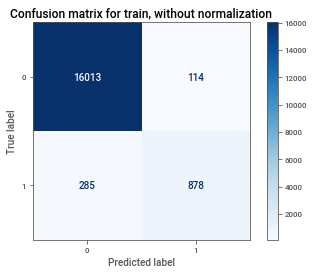

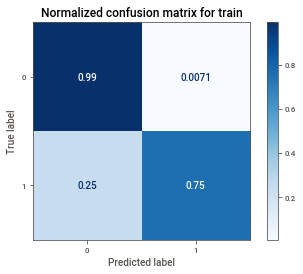

In [45]:
display_confusion_matrix(clf_l2_c1)

In [46]:
clf_l2_c1.named_steps['classifier'].coef_.shape

(1, 334)

In [60]:
clf_l2_c1.steps[1][1].coef_[0]

array([ 6.98085393e-01,  1.46484974e-01,  7.30131984e-01,  8.42704204e-02,
        1.28023368e+00, -9.83565116e-01,  4.81356114e-01,  3.68200333e-03,
        9.01317860e-02,  3.64290645e-02,  3.24314215e-01,  3.47755772e-01,
        2.44415955e-01,  2.60018111e-01, -3.96130163e-01, -1.59995594e+00,
       -1.25154221e-01, -8.13214335e-02, -3.85308350e-02,  9.09183805e-02,
       -1.68306249e-03, -2.80403318e-01, -5.42854168e-01,  7.48901330e-01,
       -2.35848382e-01, -5.11366650e-01, -6.07054603e-01,  5.46230415e-02,
       -3.21182237e-01, -2.36549168e-01,  1.14713359e-01,  3.05187440e-01,
        1.84782697e-01,  4.72788640e-01,  5.49566997e-01,  6.25974706e-02,
       -2.68309014e-01, -9.28451840e-02,  3.22073339e-01,  3.91694637e-01,
        7.92888951e-02, -6.09510285e-02, -6.71033303e-01,  2.12471290e-05,
        1.59224137e-01, -6.22148727e-01, -2.21805683e-02,  1.09594235e-07,
        5.39261526e-02, -7.02192026e-03, -3.15448719e-01, -1.46265746e-01,
       -4.87193076e-01, -

In [50]:
%matplotlib inline

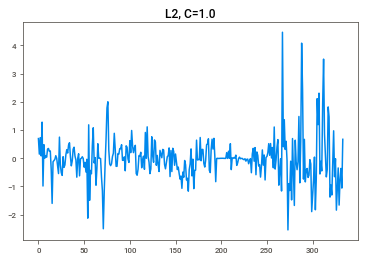

In [66]:
plt.title('L2, C=1.0')
plt.plot(clf_l2_c1.steps[1][1].coef_[0])

# Model 2

In [22]:
# Classifier model
clf_model_l1_c1 = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_c1)])

# Fit model on new training data - notice that clf is actually the Pipeline
clf_l1_c1.fit(X_train, y_train)

print(f"Training score: {clf_l1_c1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_c1.score(X_test, y_test):.3f}")

Training score: 0.978
Test score: 0.971


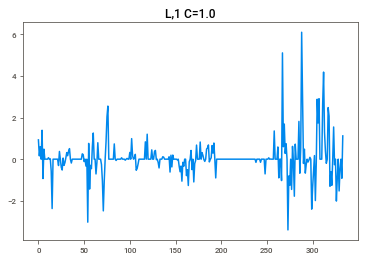

In [67]:
plt.title('L,1 C=1.0')
plt.plot(clf_l1_c1.steps[1][1].coef_[0])

# Model 3


In [23]:
# Classifier model
clf_model_l1_01 = LogisticRegression(penalty='l1', C=.01, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_01 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_01)])

# Fit model on new training data - notice that clf is actually the Pipeline
clf_l1_01.fit(X_train, y_train)

print(f"Training score: {clf_l1_01.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_01.score(X_test, y_test):.3f}")

Training score: 0.953
Test score: 0.948


C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


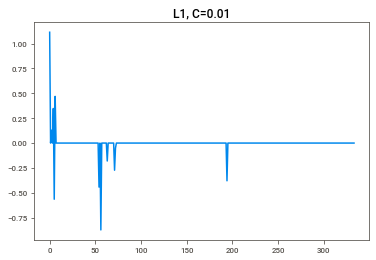

In [68]:
plt.title('L1, C=0.01')
plt.plot(clf_l1_01.steps[1][1].coef_[0])

The coeffecient plot for model 3 has lesser noise than compared with that of model 1 and model 2. This is mainly because the low value of C.

# Model 4: Lasso regression with optimal C value

In [142]:
# Classifier model using saga
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegressionCV(penalty='l1', 
                                                                 Cs=[0.1, 1,5, 10], 
                                                                 solver='saga',
                                                                 max_iter=200))])

lr_clf.fit(X_train, y_train)



print(f"Best model score for Lasso : {lr_clf['classifier'].scores_}")
print(f"Best C Value is : {lr_clf['classifier'].C_}")




C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

Best model score for Lasso : {1: array([[0.96587623, 0.97165992, 0.9719491 , 0.97223829],
       [0.96616541, 0.97079237, 0.97079237, 0.97050318],
       [0.96674378, 0.97137073, 0.97223829, 0.97310584],
       [0.96674378, 0.9719491 , 0.97513013, 0.97513013],
       [0.96818971, 0.970214  , 0.97108155, 0.9719491 ]])}
Best C Value is : [10.]


C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


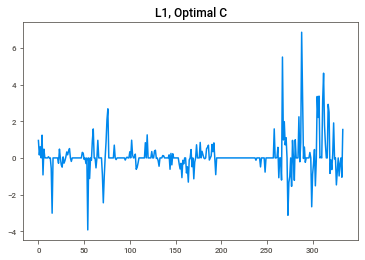

In [69]:
plt.title('L1, Optimal C')
plt.plot(lr_clf.steps[1][1].coef_[0])

In [84]:
# Classifier model using liblinear
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegressionCV(penalty='l1', 
                                                                 Cs=[0.1, 1,5, 10], 
                                                                 solver='liblinear',
                                                                 max_iter=200))])

lr_clf.fit(X_train, y_train)



print(f"Best model score for Lasso : {lr_clf['classifier'].scores_}")
print(f"Best C Value is : {lr_clf['classifier'].C_}")

Best model score for Lasso : {1: array([[0.96674378, 0.97310584, 0.97137073, 0.97108155],
       [0.96616541, 0.97108155, 0.96876807, 0.96992481],
       [0.96703297, 0.97310584, 0.97252747, 0.97281666],
       [0.9664546 , 0.97455176, 0.97541932, 0.97484095],
       [0.96876807, 0.97223829, 0.97108155, 0.96992481]])}
Best C Value is : [1.]


# Task 5 - Random forest model

In [25]:
# Append random forest classifier to preprocessing pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])


clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")




Training score: 1.000
Test score: 0.970


In [26]:
# Final random forest classifier model
clf_RF_model_final = RandomForestClassifier(oob_score=True, random_state=0)

# Append classifier to preprocessing pipeline.
clf_RF_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_RF_model_final)])

# Fit model on training data 
clf_RF_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_RF_final.score(X_train, y_train))

# Make predictions on the test data
clf_RF_final_predictions = clf_RF_final.predict(X_test)

Training score: 1.000


In [27]:
print(clf_RF_final_predictions[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


Confusion matrix for train, without normalization
[[16127     0]
 [    0  1163]]
Normalized confusion matrix for train
[[1. 0.]
 [0. 1.]]


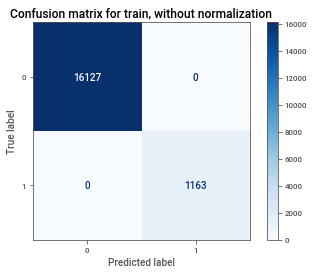

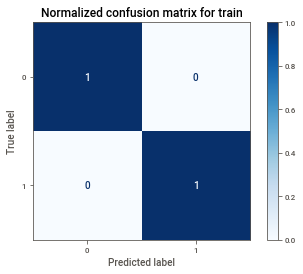

In [28]:
display_confusion_matrix(clf_RF_final)

Random forests dont use regularizations and C values unlike the logistic regression models, Hence coeff plot need not be used in this case.

# Task 6 - a little error exploration

In [120]:
# Final logistic regression classifier model
clf_LR_model_final = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
clf_LR_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_LR_model_final)])

# Fit model on training data 
clf_LR_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_LR_final.score(X_train, y_train))

# Make predictions on the test data
clf_LR_final_predictions = clf_LR_final.predict(X_test)
print(clf_LR_final_predictions[:10])  # Print out a few predictions just to see what they look like




Training score: 0.977
[0 0 0 0 0 0 0 0 0 0]


C:\Users\Students\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [121]:
clf_LR_final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
clf_LR_final_predictions.size

4323

In [123]:
y_test.head()

13473    0
9626     0
21376    0
9036     0
1007     0
Name: price_gt_1M, dtype: int64

In [124]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 4323 entries, 13473 to 18167
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
4323 non-null   int64
dtypes: int64(1)
memory usage: 67.5 KB


In [125]:
s = pd.Series(y_test, name="price")
price_df = s.to_frame()
price_df

,price
13473,0
9626,0
21376,0
9036,0
1007,0
...,...
662,0
16297,0
1390,0
3546,0


In [126]:
price_df['price_predict'] = clf_LR_final_predictions.tolist()
price_df

,price,price_predict
13473,0,0
9626,0,0
21376,0,0
9036,0,0
1007,0,0
...,...,...
662,0,0
16297,0,0
1390,0,0
3546,0,0


In [127]:
price_df['compare'] = np.where((price_df['price'] != price_df['price_predict']) , 'false', 'true')
price_df['compare'].value_counts()

true     4199
false     124
Name: compare, dtype: int64

Now lets read in the kc_house_data_regression.csv file and get the actual prices of the property

In [132]:
housing_df_reg = pd.read_csv("./data/kc_house_data_regression.csv")


price_from_regression = housing_df_reg.iloc[:, 17]
price_from_regression


#price_df['actual_price'] = price_from_regression.tolist()
#price_df

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [135]:
price_df['actual_price'] = price_from_regression.loc[price_from_regression.index]
price_df

,price,price_predict,compare,actual_price
13473,0,0,true,257000.0
9626,0,0,true,201000.0
21376,0,0,true,365000.0
9036,0,0,true,667000.0
1007,0,0,true,325000.0
...,...,...,...,...
662,0,0,true,475000.0
16297,0,0,true,615000.0
1390,0,0,true,651000.0
3546,0,0,true,436000.0


In [136]:
price_incorrect_df = price_df[price_df['compare'] == 'false'] 
price_incorrect_df

,price,price_predict,compare,actual_price
4937,1,0,false,1400000.0
16888,0,1,false,995000.0
12591,1,0,false,1075000.0
11947,1,0,false,1150000.0
11421,1,0,false,1017000.0
...,...,...,...,...
9945,1,0,false,1150000.0
1807,0,1,false,930000.0
8539,1,0,false,1208000.0
4892,0,1,false,952000.0


array([[<AxesSubplot:title={'center':'actual_price'}>]], dtype=object)

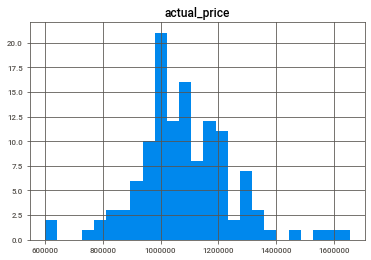

In [138]:
price_incorrect_df.hist(column='actual_price',bins=25)

Price predictions for home valued between 1 and 1.3 M seem to have more erros than compared to other price ranges.